# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Putri Nanda Sari
- Email: nandasariputri42@gmail.com
- Id Dicoding: putri_nanda

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Manipulasi data
import pandas as pd
import numpy as np

#Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model klasifikasi
from sklearn.linear_model import LogisticRegression

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Simpan model
import joblib

Tahapan ini untuk melakukan import library yang akan dibutuhkan dalam preprocessing data, pembangunan model, dan evaluasi model.

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
URL = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"

df = pd.read_csv(URL, delimiter=";")
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Tahapan ini untuk load dataset yang disediakan oleh instansi. Dataser dibaca melaui URL yang kemudian ditampilkan 5 baris pertama dari dataset tersebut

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Pemahaman data dimulai dengan mengecek informasi umum dataset menggunakan perintah `df.info()`. Dataset ini terdiri dari 4.424 entri tanpa adanya missing value  dan 37 fitur yang mencakup karakteristik pribadi, akademik, dan sosial-ekonomi mahasiswa. Target prediksi adalah kolom Status, yang menunjukkan apakah mahasiswa tersebut melanjutkan studi atau mengalami dropout.

In [4]:
df.duplicated().sum()

np.int64(0)

Tahapan ini untuk memeriksa total data duplikasi pda dataset. Pada dataset ini tidak ditemukan adanya data duplikasi sehingga cukup memudahkan dalam tahap preprocessing

In [5]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


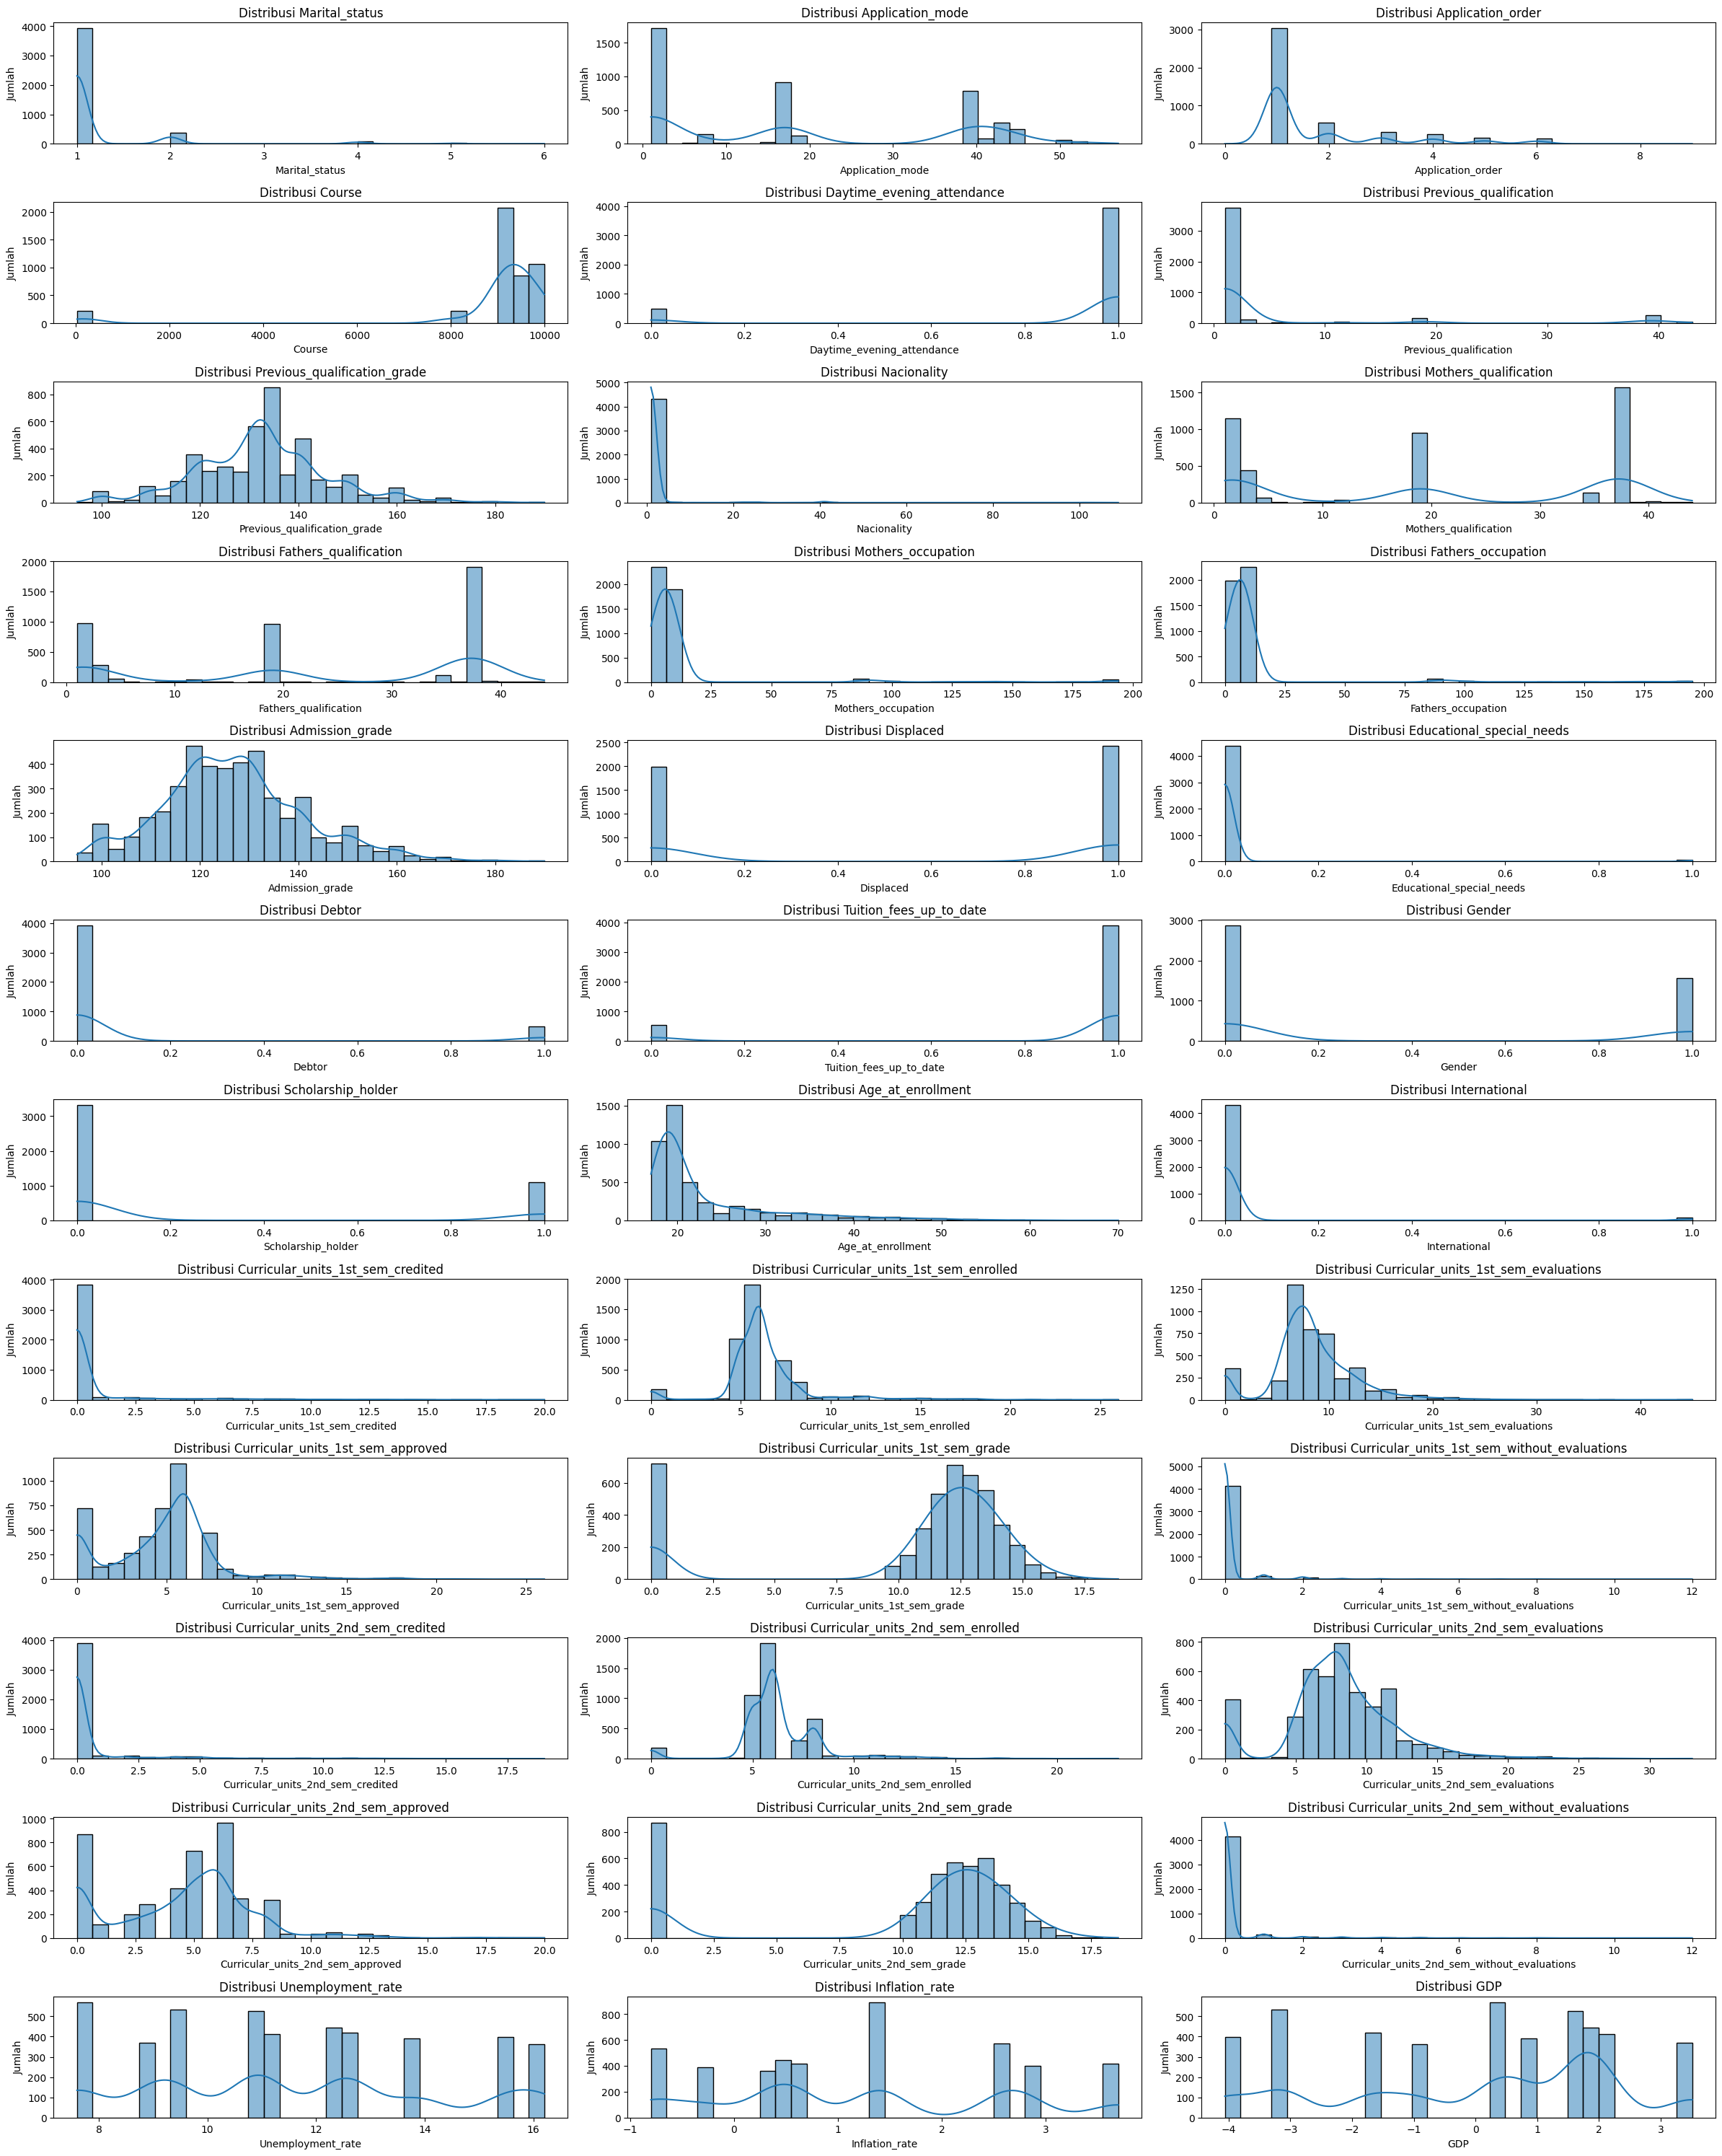

In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(24, 30))  # Ukuran kanvas besar agar semua grafik muat
for i, feature in enumerate(numeric_columns):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

**Insight:**  
Distribusi fitur numerik menunjukkan bahwa beberapa variabel seperti `Admission_grade` dan `Curricular_units_1st_sem_grade` memiliki sebaran normal, sementara fitur lain seperti `Age_at_enrollment`, `GDP`, dan jumlah mata kuliah yang diambil menunjukkan kemiringan distribusi dan potensi outlier. Beberapa kolom numerik seperti `Course`, `Application_mode`, dan `Gender` merupakan kategori berkode angka dan sebaiknya diperlakukan sebagai data kategorikal. Fitur sosial ekonomi seperti `Unemployment_rate` dan `Inflation_rate` menunjukkan distribusi multimodal.

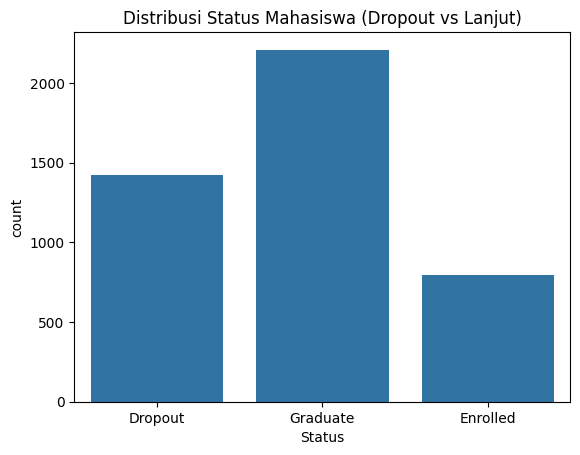

In [7]:
#Visualisasi Distribusi Target
sns.countplot(data=df, x='Status')
plt.title('Distribusi Status Mahasiswa (Dropout vs Lanjut)')
plt.show()

**Insight:**  
Sebagian besar mahasiswa di Jaya Jaya Institut berhasil lulus (Graduate), namun terdapat proporsi yang cukup signifikan yang mengalami dropout (sekitar sepertiga dari total populasi). Sementara itu, hanya sebagian kecil mahasiswa yang masih aktif (Enrolled). Kondisi ini menandakan bahwa isu dropout merupakan masalah nyata dan perlu ditangani secara serius.

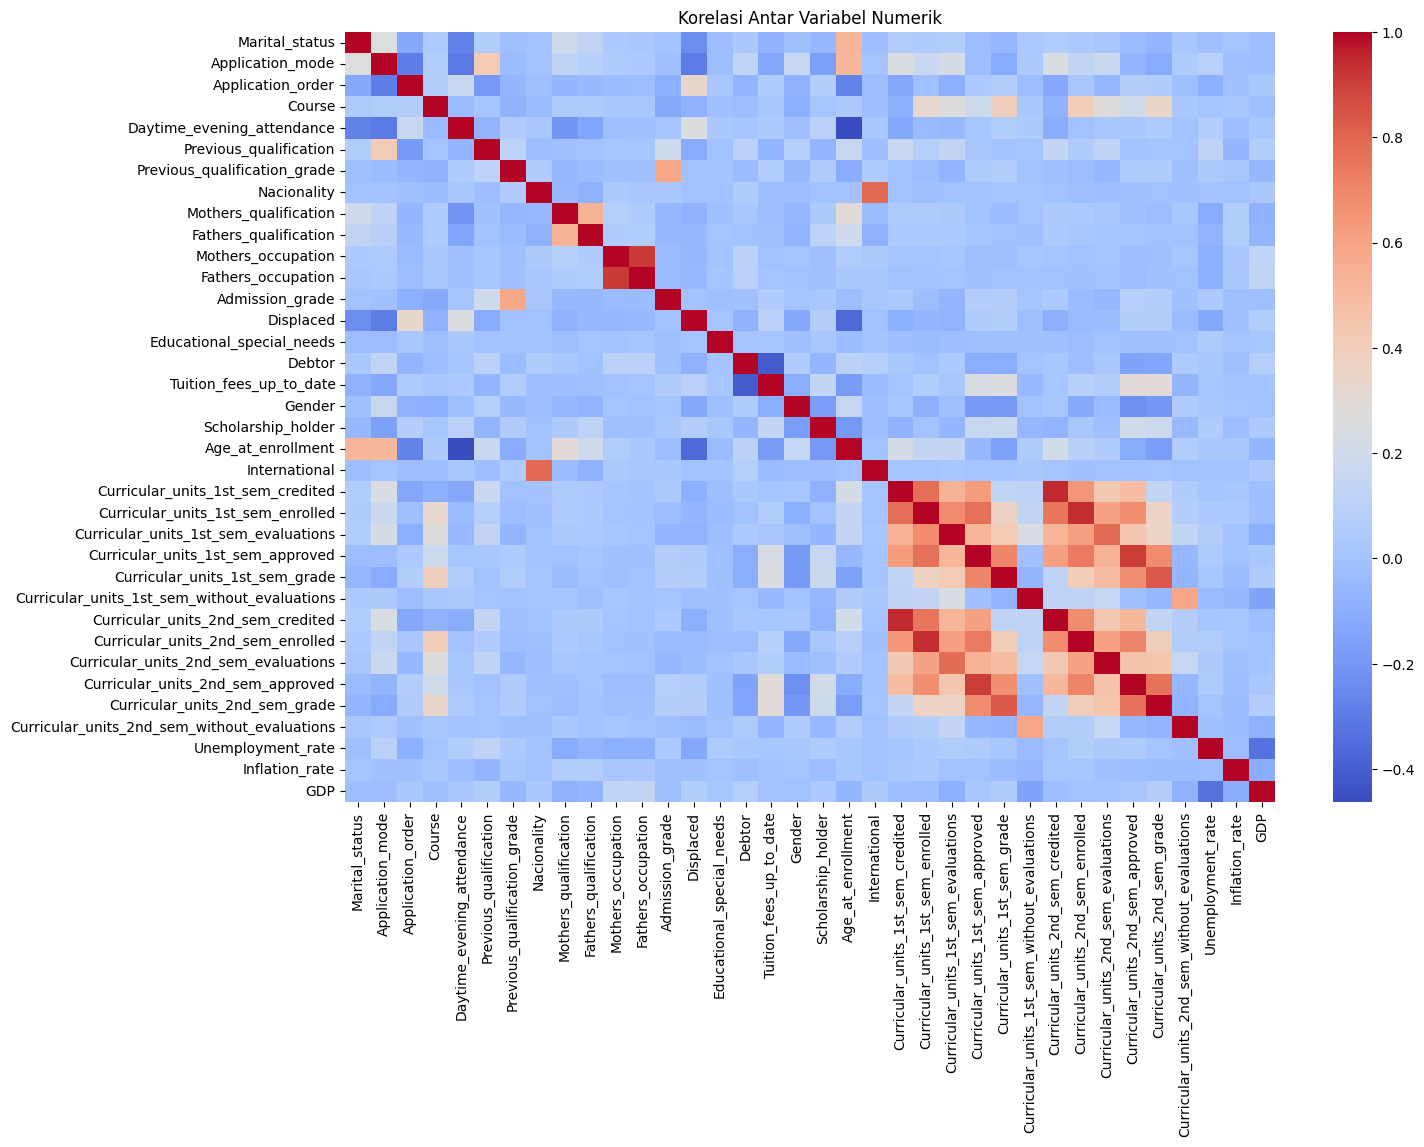

In [8]:
#Korelasi antar fitur
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

**Insight:**  
beberapa fitur memiliki hubungan yang sangat kuat satu sama lain, khususnya pada data akademik semester 1 dan semester 2. Misalnya, nilai rata-rata, jumlah mata kuliah yang diambil, serta jumlah yang disetujui dan dievaluasi pada semester pertama dan kedua menunjukkan pola korelasi yang sangat mirip. Ini mengindikasikan bahwa sebagian fitur tersebut mengandung informasi yang hampir sama, sehingga beberapa di antaranya dapat dihapus untuk menyederhanakan model tanpa kehilangan banyak informasi penting.

Selain itu, terdapat sejumlah fitur yang tampak tidak memiliki hubungan yang signifikan dengan fitur lainnya, seperti GDP, Inflation_rate, dan Unemployment_rate. Demikian pula dengan kolom seperti Displaced, Educational_special_needs, dan International yang tampaknya memiliki nilai informasi yang rendah dan tidak banyak berkontribusi terhadap variasi data secara keseluruhan.


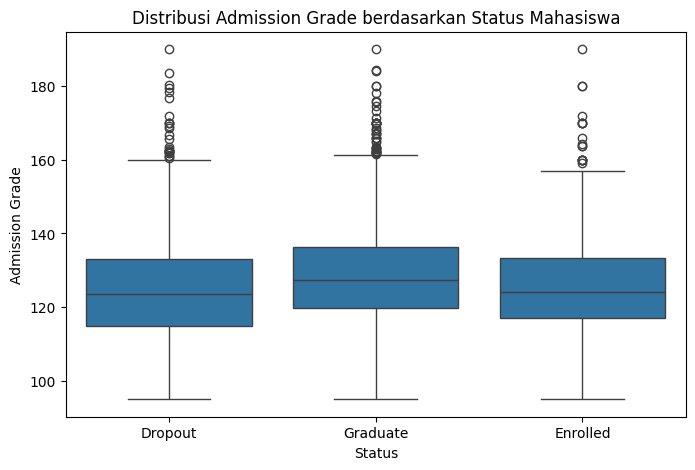

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Status', y='Admission_grade')
plt.title('Distribusi Admission Grade berdasarkan Status Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Admission Grade')
plt.show()

Insight:
Pada diagram distribusi nilai `Admission_grade` berdasarkan status mahasiswa diketahui bahwa ketiga kelompok memiliki distribusi yang serupa, dengan median nilai berada di kisaran 125–130. Namun, kelompok Graduate cenderung memiliki nilai median sedikit lebih tinggi dibandingkan kelompok lainnya, menunjukkan bahwa mahasiswa yang lulus umumnya memiliki nilai masuk yang lebih baik. Sementara itu, outlier yang cukup banyak pada ketiga kelompok menunjukkan adanya mahasiswa dengan nilai masuk yang jauh di atas rata-rata, namun hal ini tidak selalu menjamin kelulusan. Hal ini mengindikasikan bahwa meskipun admission grade berkontribusi terhadap keberhasilan studi, faktor lain juga turut berperan penting.

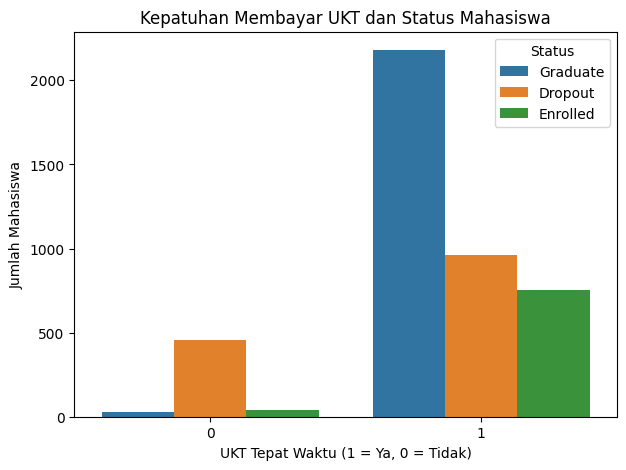

In [10]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Tuition_fees_up_to_date', hue='Status')
plt.title('Kepatuhan Membayar UKT dan Status Mahasiswa')
plt.xlabel('UKT Tepat Waktu (1 = Ya, 0 = Tidak)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status')
plt.show()

**Insight:**  
Pada diagram terlihat bahwa mayoritas mahasiswa yang lulus (Graduate) membayar UKT tepat waktu, dengan jumlah jauh lebih tinggi dibandingkan kelompok lainnya. Sebaliknya, proporsi mahasiswa Dropout yang tidak membayar UKT tepat waktu juga cukup besar, menunjukkan keterkaitan antara ketidakpatuhan pembayaran dengan risiko putus studi. Mahasiswa Enrolled yang masih aktif sebagian besar juga membayar UKT tepat waktu. Insight ini mengindikasikan bahwa kepatuhan membayar UKT berpotensi menjadi indikator awal untuk mengidentifikasi mahasiswa yang berisiko tidak menyelesaikan studi.

/tmp/ipython-input-11-479033069.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Status', y='Age_at_enrollment', ci=None)


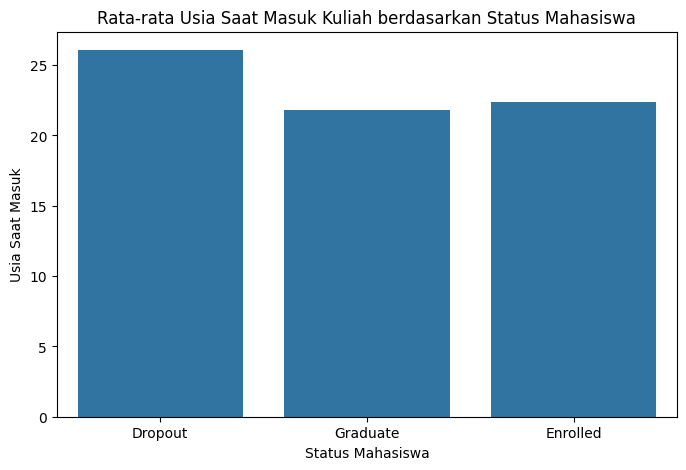

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Status', y='Age_at_enrollment', ci=None)
plt.title('Rata-rata Usia Saat Masuk Kuliah berdasarkan Status Mahasiswa')
plt.xlabel('Status Mahasiswa')
plt.ylabel('Usia Saat Masuk')
plt.xticks(rotation=0)
plt.show()

**Insight:**  
Diagram batang ini memperlihatkan rata-rata usia saat masuk kuliah berdasarkan status mahasiswa. Terlihat bahwa mahasiswa yang berstatus Dropout memiliki usia masuk yang paling tinggi, yaitu sekitar 26 tahun, dibandingkan dengan mahasiswa Graduate dan Enrolled yang rata-rata memulai kuliah di usia sekitar 22 tahun. Hal ini menunjukkan bahwa mahasiswa yang masuk kuliah di usia lebih tua cenderung memiliki risiko lebih tinggi untuk tidak menyelesaikan studinya, kemungkinan karena beban tanggung jawab lain seperti pekerjaan atau keluarga.

/tmp/ipython-input-12-2731182156.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Status', y='Curricular_units_1st_sem_enrolled', ci=None)


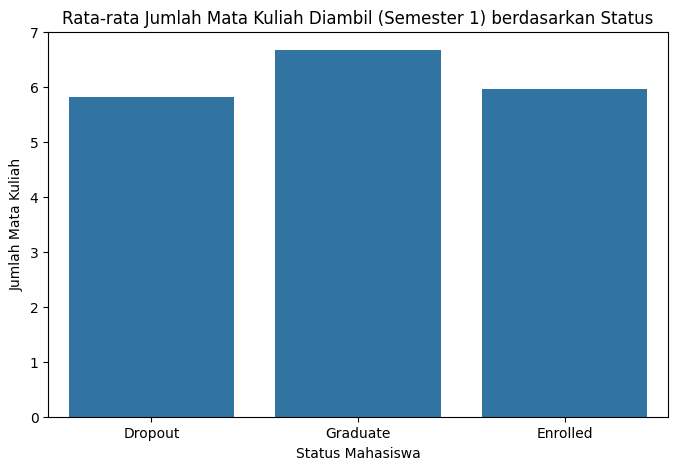

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Status', y='Curricular_units_1st_sem_enrolled', ci=None)
plt.title('Rata-rata Jumlah Mata Kuliah Diambil (Semester 1) berdasarkan Status')
plt.xlabel('Status Mahasiswa')
plt.ylabel('Jumlah Mata Kuliah')
plt.xticks(rotation=0)
plt.show()

**Insight:**  
Diagram ini menunjukkan rata-rata jumlah mata kuliah yang diambil pada semester 1 berdasarkan status mahasiswa. Terlihat bahwa mahasiswa yang lulus (Graduate) mengambil jumlah mata kuliah terbanyak dibandingkan kelompok lainnya, dengan rata-rata hampir 7 mata kuliah. Sebaliknya, mahasiswa yang Dropout memiliki rata-rata mata kuliah paling sedikit, yaitu di bawah 6. Hal ini mengindikasikan bahwa beban studi pada semester awal dapat menjadi indikator awal kesuksesan akademik, di mana mahasiswa yang mengambil lebih banyak mata kuliah cenderung memiliki peluang kelulusan lebih tinggi. Sebaliknya, mahasiswa dengan jumlah mata kuliah rendah mungkin memerlukan perhatian atau bimbingan tambahan.

## Data Preparation / Preprocessing

In [13]:
# Menghapus kolong yang tidak penting
comuns_to_drop = [
        # Fitur ekonomi makro yang tidak relevan untuk model individual
    'Unemployment_rate', 'Inflation_rate', 'GDP',

    # Fitur dengan nilai distribusi timpang atau sangat jarang
    'Displaced', 'Educational_special_needs', 'International',

    # Fitur semester 2 (karena prediksi fokus di awal studi)
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',

    # Fitur semester 1 yang redundan atau tidak informatif
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_without_evaluations',

    # Kategori dengan terlalu banyak label atau distribusi tidak merata
    'Nacionality', 'Application_mode', 'Course'
]

df_cleaned = df.drop(columns=comuns_to_drop)
df_cleaned.head()

,Marital_status,Application_order,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Status
0,1,5,1,1,122.0,19,12,5,9,127.3,0,1,1,0,20,0,0,0,0.000000,Dropout
1,1,1,1,1,160.0,1,3,3,3,142.5,0,0,1,0,19,6,6,6,14.000000,Graduate
2,1,5,1,1,122.0,37,37,9,9,124.8,0,0,1,0,19,6,0,0,0.000000,Dropout
3,1,2,1,1,122.0,38,37,5,3,119.6,0,1,0,0,20,6,8,6,13.428571,Graduate
4,2,1,0,1,100.0,37,38,9,9,141.5,0,1,0,0,45,6,9,5,12.333333,Graduate


Langkah ini dilakukan untuk menyederhanakan model, mengurangi noise, dan mencegah overfitting dengan cara menghapus fitur-fitur yang dianggap tidak memberikan kontribusi signifikan terhadap prediksi risiko dropout. Berikut alasan penghapusan masing-masing kelompok fitur:

* Fitur Ekonomi Makro (`Unemployment_rate`, `Inflation_rate`, `GDP`):
Tidak merefleksikan kondisi individu mahasiswa secara langsung. Variasi antar individu kecil sehingga tidak informatif dalam klasifikasi dropout.

* Fitur Bernilai Jarang atau Dominan Satu Kelas (`Displaced`, `Educational_special_needs`, `International`):
Nilainya sangat timpang (dominan 0), sehingga kontribusinya terhadap model sangat kecil dan justru bisa menambah noise.

* Fitur Semester 2 (Curricular_units_2nd_sem_*):
Fokus prediksi adalah deteksi dini dropout sejak semester pertama. Oleh karena itu, data semester 2 tidak digunakan agar tidak terjadi "data leakage".

* Fitur Semester 1 yang Redundan (`Curricular_units_1st_sem_credited`, `Curricular_units_1st_sem_without_evaluations`):
Memiliki informasi tumpang tindih atau nilai konstan sehingga tidak memberikan informasi baru.

* Fitur Kategorikal dengan Banyak Nilai Unik / Distribusi Tidak Merata (`Nacionality`, `Application_mode`, `Course`):
Memiliki terlalu banyak kategori dengan frekuensi tidak seimbang, sehingga menyulitkan encoding dan tidak efisien bagi model.

In [14]:
#Label pada Fitur Target
df_cleaned['Status'] = df_cleaned['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

Langkah ini bertujuan untuk mengubah label target Status dari bentuk kategorikal ('Dropout', 'Enrolled', 'Graduate') menjadi format numerik biner yang bisa digunakan dalam model klasifikasi.
Karena tujuan utama model ini adalah mendeteksi lebih awal apakah seorang mahasiswa akan dropout atau tidak, maka encoding dilakukan sebagai berikut:
* Dropout → 1 (positif/target dropout)
* Enrolled atau Graduate → 0 (negatif/bukan dropout)

In [15]:
#Data Splitting
X = df_cleaned.drop('Status', axis=1)
y = df_cleaned['Status']

# Split data 80% latih, 20% uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

feature_names = X_train.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

['feature_names.pkl']

Tahapan inno bertujuan untuk mebagi data menjadi dua bagian yaitu data latih dan data testing

In [16]:
#Scaling Fitur

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

joblib.dump(scaler, 'scaler_model.pkl')

['scaler_model.pkl']

Pada tahap ini, semua fitur numerik distandarkan menggunakan StandardScaler agar memiliki skala yang seragam, yaitu rata-rata = 0 dan standar deviasi = 1. Scaling penting dilakukan agar algoritma machine learning, khususnya yang berbasis jarak atau optimasi gradient, dapat bekerja secara optimal. Proses `fit_transform()` hanya dilakukan pada data latih `(X_train)` agar tidak terjadi data leakage. Kemudian, `transform()` digunakan untuk menskalakan data uji `(X_test)` menggunakan skala yang sama dari data latih.

## Modeling

In [17]:
#Modeling dengan Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

joblib.dump(model_lr, 'model_logreg.pkl')
print("Model Logistic Regression berhasil disimpan sebagai 'dropout_model_logreg.pkl'")

Model Logistic Regression berhasil disimpan sebagai 'dropout_model_logreg.pkl'


## Evaluation

In [18]:
# Prediksi pada data uji
y_pred = model_lr.predict(X_test_scaled)

# Evaluasi hasil prediksi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Akurasi Model:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[565  36]
 [ 96 188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       601
           1       0.84      0.66      0.74       284

    accuracy                           0.85       885
   macro avg       0.85      0.80      0.82       885
weighted avg       0.85      0.85      0.85       885

Akurasi Model: 0.8508474576271187


Evaluasi model dilakukan menggunakan confusion matrix dan classification report pada data uji. Hasil evaluasi menunjukkan bahwa model Random Forest memiliki akurasi sebesar 85%, yang cukup baik untuk kasus klasifikasi biner seperti prediksi dropout mahasiswa.

Beberapa insight penting:
* Tingkat keberhasilan model dalam mendeteksi mahasiswa dropout (kelas 1) tercermin dari nilai:
* Recall = 0.66 → Artinya, sekitar 66% mahasiswa yang benar-benar dropout berhasil dikenali oleh model.
* Precision = 0.84 → Dari semua prediksi dropout, 84% benar-benar dropout.
* Keseimbangan performa antar kelas cukup baik, ditunjukkan oleh nilai macro average F1-score = 0.82.
* Kelas mayoritas (tidak dropout) juga dikenali dengan sangat baik (Recall = 0.94), menunjukkan bahwa model mampu mengenali pola umum dengan baik.